In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"Prayagraj_Traffic_Data.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()

# Display the first few rows of the DataFrame
df.head()


,record_id,timestamp,intersection_id,intersection_name,latitude,longitude,vehicle_count,average_speed,signal_cycle_time,green_time,...,weather_condition,day_of_week,is_holiday,event,pollution_level,car_count,bus_count,truck_count,motorcycle_count,hour
0,9926.0,2023-01-07 21:20:00,6.0,Allahabad Junction,25.4358,81.8307,75.0,39.72,120.0,63.0,...,Clear,Saturday,0.0,NaN,1.21,48.0,4.0,6.0,17.0,21.0
1,8595.0,2023-01-06 23:10:00,5.0,Naini Bridge,25.4088,81.8592,139.0,30.33,120.0,51.0,...,Clear,Friday,0.0,NaN,2.86,89.0,13.0,17.0,20.0,23.0
2,673.0,2023-01-01 11:10:00,3.0,Chowk,25.4314,81.8437,20.0,53.28,120.0,69.0,...,Clear,Sunday,1.0,NaN,0.34,15.0,1.0,2.0,2.0,11.0
3,8744.0,2023-01-07 01:40:00,4.0,Tagore Town,25.4675,81.8867,21.0,36.06,120.0,59.0,...,Heavy Rain,Saturday,0.0,NaN,0.54,12.0,4.0,2.0,3.0,1.0
4,316.0,2023-01-01 05:10:00,6.0,Allahabad Junction,25.4358,81.8307,41.0,47.21,120.0,NaN,...,Clear,Sunday,1.0,NaN,0.86,26.0,6.0,2.0,7.0,5.0


In [3]:
# Remove rows where intersection_name is 'Unknown'
df = df[df['intersection_name'] != 'Unknown']

# Check the remaining data
print("Remaining entries in intersection_name after removal:")
print(df['intersection_name'].value_counts())


Remaining entries in intersection_name after removal:
intersection_name
Chowk                 1002
Civil Lines           1000
Katra                  999
Allahabad Junction     998
MNNIT Gate             996
Tagore Town            996
Minto Park             994
Phaphamau              994
Jhunsi                 993
Naini Bridge           991
Name: count, dtype: int64


In [4]:
# Check for missing values in the dataset
missing_data = df.isnull().sum()
missing_data_percentage = (df.isnull().sum() / len(df)) * 100

# Display missing data count and percentage for each column
missing_data_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0]

missing_data_summary


,Missing Values,Percentage
record_id,98,0.972222
timestamp,97,0.962302
intersection_id,92,0.912698
intersection_name,117,1.160714
latitude,106,1.051587
longitude,116,1.150794
vehicle_count,112,1.111111
average_speed,74,0.734127
signal_cycle_time,108,1.071429
green_time,92,0.912698


In [5]:
# Check initial missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Fill missing values for specific columns
# Fill numerical columns with median or zero
df['record_id'] = df['record_id'].fillna(0)  # If this is a unique identifier, filling with zero is okay
df['timestamp'] = df['timestamp'].fillna(method='ffill')  # Forward fill as timestamps may have a logical progression
df['intersection_id'] = df['intersection_id'].fillna(0)
df['intersection_name'] = df['intersection_name'].fillna('Unknown')  # Using a placeholder for categorical data
df['latitude'] = df['latitude'].fillna(df['latitude'].median())
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['signal_cycle_time'] = df['signal_cycle_time'].fillna(df['signal_cycle_time'].median())
df['green_time'] = df['green_time'].fillna(df['green_time'].median())
df['yellow_time'] = df['yellow_time'].fillna(df['yellow_time'].median())
df['red_time'] = df['red_time'].fillna(df['red_time'].median())
df['is_holiday'] = df['is_holiday'].fillna(0)  # Assuming non-holiday as a default
df['pollution_level'] = df['pollution_level'].fillna(df['pollution_level'].median())
df['car_count'] = df['car_count'].fillna(df['car_count'].median())
df['bus_count'] = df['bus_count'].fillna(df['bus_count'].median())
df['truck_count'] = df['truck_count'].fillna(df['truck_count'].median())
df['motorcycle_count'] = df['motorcycle_count'].fillna(df['motorcycle_count'].median())
df['hour'] = df['hour'].fillna(df['hour'].median())  # Fill with median hour if missing

# For the 'event' column, since it has a high number of missing values, consider dropping it
df.drop(columns=['event'], inplace=True)  # Drop if not useful

# Check for any remaining missing values
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values before handling:
record_id              98
timestamp              97
intersection_id        92
intersection_name     117
latitude              106
longitude             116
vehicle_count         112
average_speed          74
signal_cycle_time     108
green_time             92
yellow_time            89
red_time              102
weather_condition      78
day_of_week            97
is_holiday            104
event                9220
pollution_level       105
car_count              97
bus_count              95
truck_count           106
motorcycle_count      100
hour                   97
dtype: int64

Missing values after handling:
record_id              0
timestamp              0
intersection_id        0
intersection_name      0
latitude               0
longitude              0
vehicle_count        112
average_speed         74
signal_cycle_time      0
green_time             0
yellow_time            0
red_time               0
weather_condition     78
day_of_week           97
i

C:\Users\Ayush\AppData\Local\Temp\ipykernel_33508\1196744372.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['timestamp'] = df['timestamp'].fillna(method='ffill')  # Forward fill as timestamps may have a logical progression


In [6]:
# Check again for missing values after handling them
missing_data_after = df.isnull().sum()

missing_data_after_summary = pd.DataFrame({'Missing Values': missing_data_after, 'Percentage': (missing_data_after / len(df)) * 100})
missing_data_after_summary = missing_data_after_summary[missing_data_after_summary['Missing Values'] > 0]

missing_data_after_summary


,Missing Values,Percentage
vehicle_count,112,1.111111
average_speed,74,0.734127
weather_condition,78,0.773810
day_of_week,97,0.962302


C:\Users\Ayush\AppData\Local\Temp\ipykernel_33508\11391673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=peak_traffic, x='hour', y='vehicle_count', palette='viridis')


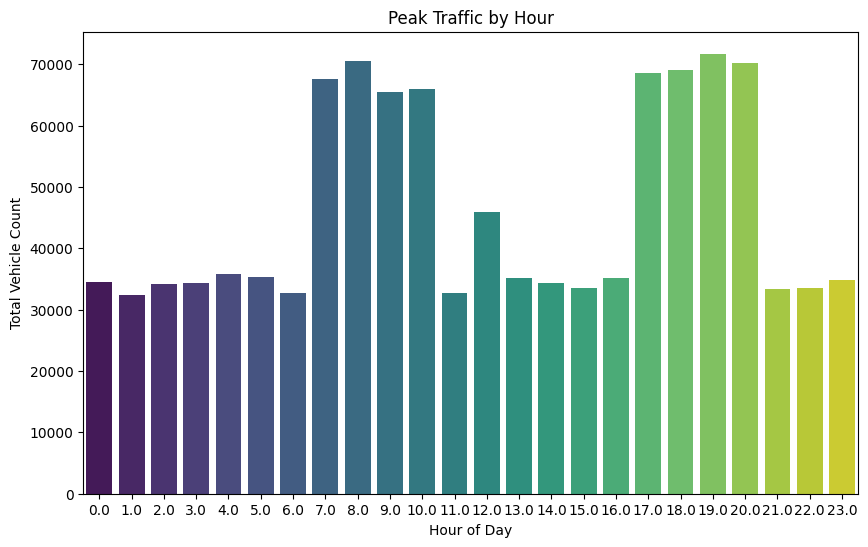

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
peak_traffic = df.groupby('hour')['vehicle_count'].sum().reset_index()

sns.barplot(data=peak_traffic, x='hour', y='vehicle_count', palette='viridis')
axs.set_title('Peak Traffic by Hour')
axs.set_xlabel('Hour of Day')
axs.set_ylabel('Total Vehicle Count')
plt.show()


C:\Users\Ayush\AppData\Local\Temp\ipykernel_33508\2331039999.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=intersection_traffic, x='intersection_name', y='vehicle_count', palette='viridis')


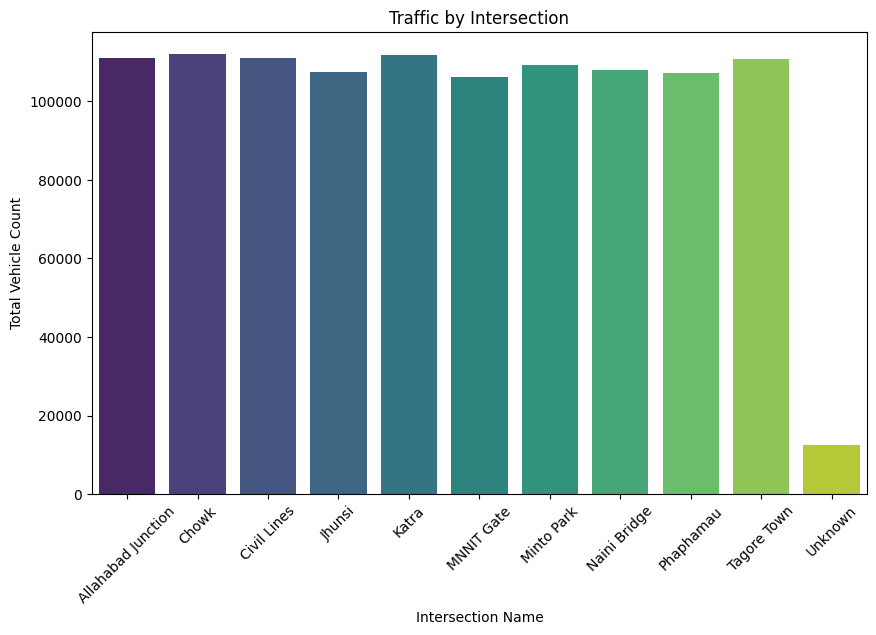

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
intersection_traffic = df.groupby('intersection_name')['vehicle_count'].sum().reset_index()

sns.barplot(data=intersection_traffic, x='intersection_name', y='vehicle_count', palette='viridis')
axs.set_title('Traffic by Intersection')
axs.set_xlabel('Intersection Name')
axs.set_ylabel('Total Vehicle Count')
axs.tick_params(axis='x', rotation=45)
plt.show()


C:\Users\Ayush\AppData\Local\Temp\ipykernel_33508\1095149181.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_analysis, x='day_of_week', y='vehicle_count', palette='viridis')


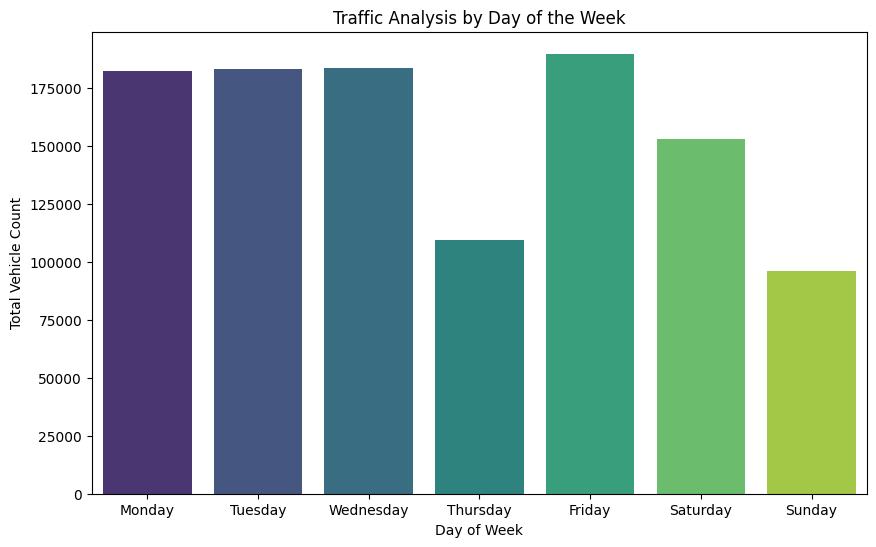

In [9]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_analysis = df.groupby('day_of_week')['vehicle_count'].sum().reindex(day_order).reset_index()

fig, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(data=day_analysis, x='day_of_week', y='vehicle_count', palette='viridis')

axs.set_title('Traffic Analysis by Day of the Week')
axs.set_xlabel('Day of Week')
axs.set_ylabel('Total Vehicle Count')
plt.show()


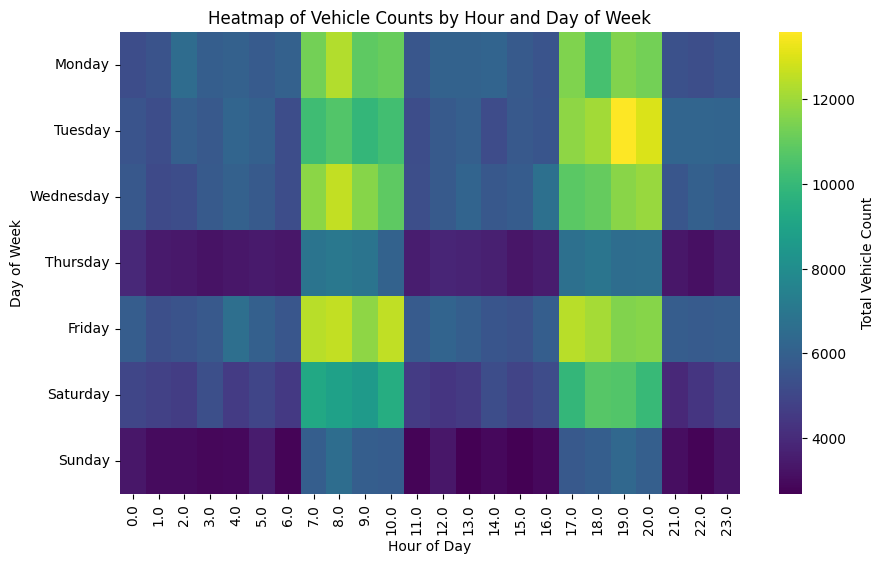

In [10]:
hour_day_traffic = df.groupby(['day_of_week', 'hour'])['vehicle_count'].sum().unstack().reindex(day_order)

fig, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(hour_day_traffic, cmap='viridis', cbar_kws={'label': 'Total Vehicle Count'})

axs.set_title('Heatmap of Vehicle Counts by Hour and Day of Week')
axs.set_xlabel('Hour of Day')
axs.set_ylabel('Day of Week')
plt.show()


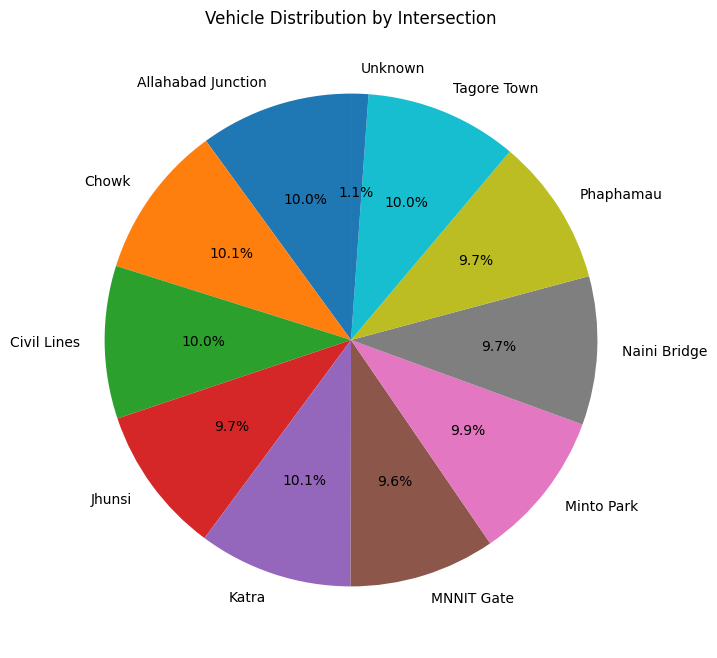

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
axs.pie(intersection_traffic['vehicle_count'], labels=intersection_traffic['intersection_name'], autopct='%1.1f%%', startangle=90)
axs.set_title('Vehicle Distribution by Intersection')
plt.show()


In [12]:
numerical_columns = ['vehicle_count', 'average_speed']
stats_summary = {}

for column in numerical_columns:
    stats_summary[column] = {
        'Mean': df[column].mean(),
        'Median': df[column].median(),
        'Mode': df[column].mode()[0],
        'Min': df[column].min(),
        'Max': df[column].max()
    }

stats_summary


{'vehicle_count': {'Mean': np.float64(111.07845104333869),
  'Median': np.float64(98.0),
  'Mode': np.float64(73.0),
  'Min': np.float64(0.0),
  'Max': np.float64(438.0)},
 'average_speed': {'Mean': np.float64(33.61013391964821),
  'Median': np.float64(33.6),
  'Mode': np.float64(35.13),
  'Min': np.float64(8.2),
  'Max': np.float64(60.0)}}

In [ ]:
categorical_columns = ['weather_condition', 'day_of_week']
categorical_summary = {}

for column in categorical_columns:
    categorical_summary[column] = df[column].value_counts()

categorical_summary



{'weather_condition': weather_condition
 Clear         7129
 Light Rain     976
 Heavy Rain     498
 Cold Wave      474
 Fog            467
 Heatwave       458
 Name: count, dtype: int64,
 'day_of_week': day_of_week
 Sunday       1431
 Thursday     1429
 Wednesday    1428
 Saturday     1427
 Tuesday      1424
 Friday       1423
 Monday       1421
 Name: count, dtype: int64}